In [ ]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [ ]:
_dfs_list = [
for csv_filename in tqdm(glob.glob('./drive/MyDrive/eeg2_CNN/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Unnamed: 0','X','Y','nd'], axis=1)

100%|██████████| 468/468 [00:11<00:00, 42.00it/s]


In [ ]:
channel_list = list(set(df['sensor position']))
channel_list.sort()

channel_mapping = {
    'AFZ':'AFz', 
    'CPZ':'CPz', 
    'CZ':'Cz', 
    'FCZ':'FCz', 
    'FP1':'Fp1',
    'FP2':'Fp2', 
    'FPZ':'Fpz', 
    'FZ':'Fz', 
    'OZ':'Oz', 
    'POZ':'POz', 
    'PZ':'Pz',
}

channel_mapping_full = dict()

for ch in channel_list:
    if ch in channel_mapping:
        channel_mapping_full[ch] = channel_mapping[ch]
    else:
        channel_mapping_full[ch] = ch

channel_list_fixed = [channel_mapping_full[ch] for ch in channel_list]
        
df['sensor position'] = df['sensor position'].map(channel_mapping_full)

In [ ]:
transposed_df_list = []

for group_df in tqdm(df.groupby(['name', 'trial number', 'matching condition', 'sensor position', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]
    
    transposed_df_list.append(_df)
    
df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)

100%|██████████| 29952/29952 [01:48<00:00, 276.78it/s]


In [ ]:
def get_record_df(df, name, trial_number, matching_condition, channel_list):
    df_record = df[df['name'].eq(name) & df['trial number'].eq(trial_number) & df['matching condition'].eq(matching_condition)].set_index(['sensor position']).loc[channel_list]
    return df_record

In [ ]:
def get_signal_array(df, name, trial_number, matching_condition, channel_list):
    df_record = get_record_df(df, name, trial_number, matching_condition, channel_list)
    return df_record.to_numpy()[:, 4:]

In [ ]:
signal_array_a = get_signal_array(df,'co2a0000364', 10, 'S1 obj', channel_list_fixed)
signal_array_a.shape

(64, 256)

In [ ]:
def plot_eeg_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):

    montage = mne.channels.make_standard_montage('standard_1020')
    
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    evoked.set_montage(montage)

    evoked.plot_topomap(np.arange(start_time, end_time, step_size), ch_type='eeg', time_unit='s', ncols=5, nrows=2, show_names=show_names);

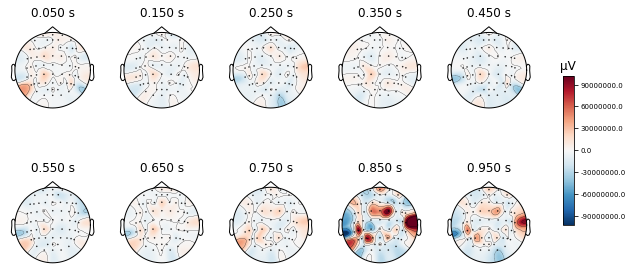

In [ ]:
# Alcohol Group_CNN_denoised

plot_eeg_topomap(signal_array_a, show_names=False)

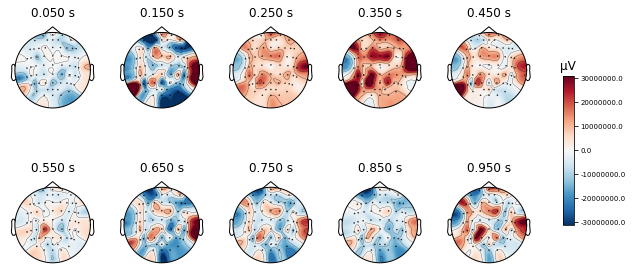

In [ ]:
# Control Group_CNN_denoised

plot_eeg_topomap(signal_array_c, show_names=False)

No projector specified for this dataset. Please consider the method self.add_proj.


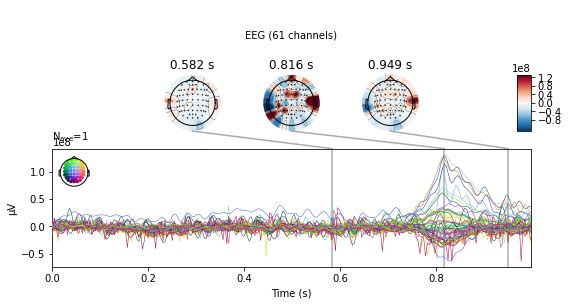

In [ ]:
# Alcohol Group
montage = mne.channels.make_standard_montage('standard_1020')
    
ch_to_remove = []
for ch in channel_list_fixed:
    if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
       ch_to_remove.append(channel_list_fixed.index(ch))
arr = np.delete(signal_array_a.copy(), ch_to_remove, axis=0)
    
info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
evoked = mne.EvokedArray(arr, info)
    
evoked.set_montage(montage)

evoked.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


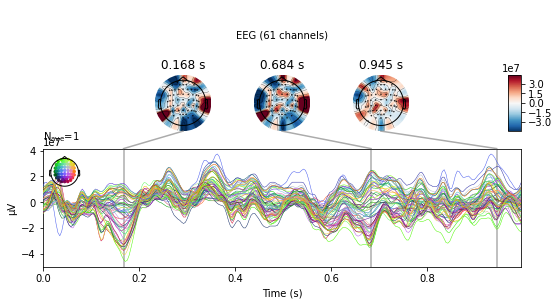

In [ ]:
# Control group
montage = mne.channels.make_standard_montage('standard_1020')
    
ch_to_remove = []
for ch in channel_list_fixed:
    if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
       ch_to_remove.append(channel_list_fixed.index(ch))
arr = np.delete(signal_array_c.copy(), ch_to_remove, axis=0)
    
info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
evoked = mne.EvokedArray(arr, info)
    
evoked.set_montage(montage)

evoked.plot_joint();